In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error as MSE
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
gas = pd.read_csv('resumen_gasolinas.csv')


In [3]:
gas.columns
gas.dtypes
gas.shape

(28, 4)

In [4]:
gas.head()

year  produccion  importacion   consumo
0  1990     929.894       68.679   908.869
1  1991     961.897      140.786   972.306
2  1992     910.830      168.231   975.078
3  1993     935.893      172.761   990.515
4  1994     967.448      147.434  1038.276

In [5]:
gas['year'] = pd.to_datetime(gas.year, format='%Y')
gas['importacion_copy'] = gas['importacion']
gas['importacion_org'] = gas['importacion']*(10**9/34.78)
gas['importacion'] = gas['importacion']/np.sum(gas['importacion'].values)


In [6]:
gas.index = gas.year
gas.head()


year  produccion  importacion   consumo  importacion_copy  \
year                                                                         
1990-01-01 1990-01-01     929.894     0.005797   908.869            68.679   
1991-01-01 1991-01-01     961.897     0.011883   972.306           140.786   
1992-01-01 1992-01-01     910.830     0.014200   975.078           168.231   
1993-01-01 1993-01-01     935.893     0.014582   990.515           172.761   
1994-01-01 1994-01-01     967.448     0.012444  1038.276           147.434   

            importacion_org  
year                         
1990-01-01     1.974669e+09  
1991-01-01     4.047901e+09  
1992-01-01     4.837004e+09  
1993-01-01     4.967251e+09  
1994-01-01     4.239045e+09

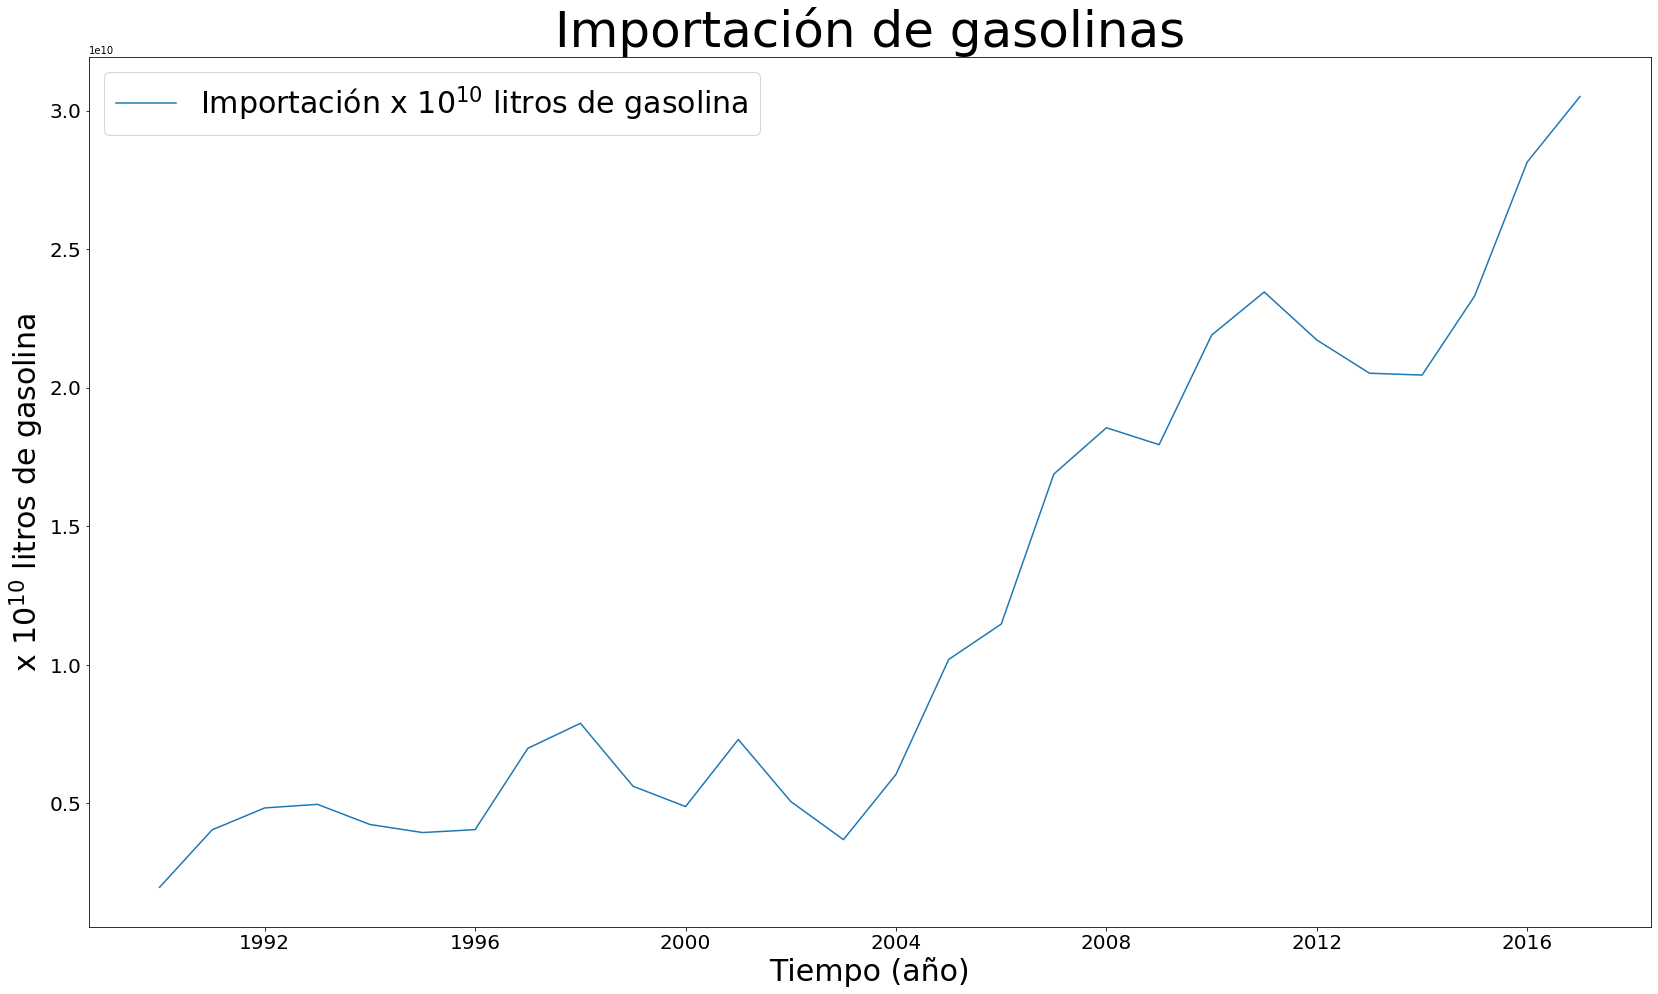

In [7]:
plt.figure(figsize = (28, 16))
plt.plot(gas.importacion_org, label='Importación x $10^{10}$ litros de gasolina')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Serie de tiempo', fontsize=30)
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('x $10^{10}$ litros de gasolina', fontsize=30)
plt.legend(loc='best', fontsize=30)
plt.title('Importación de gasolinas', fontsize=50)
plt.show()

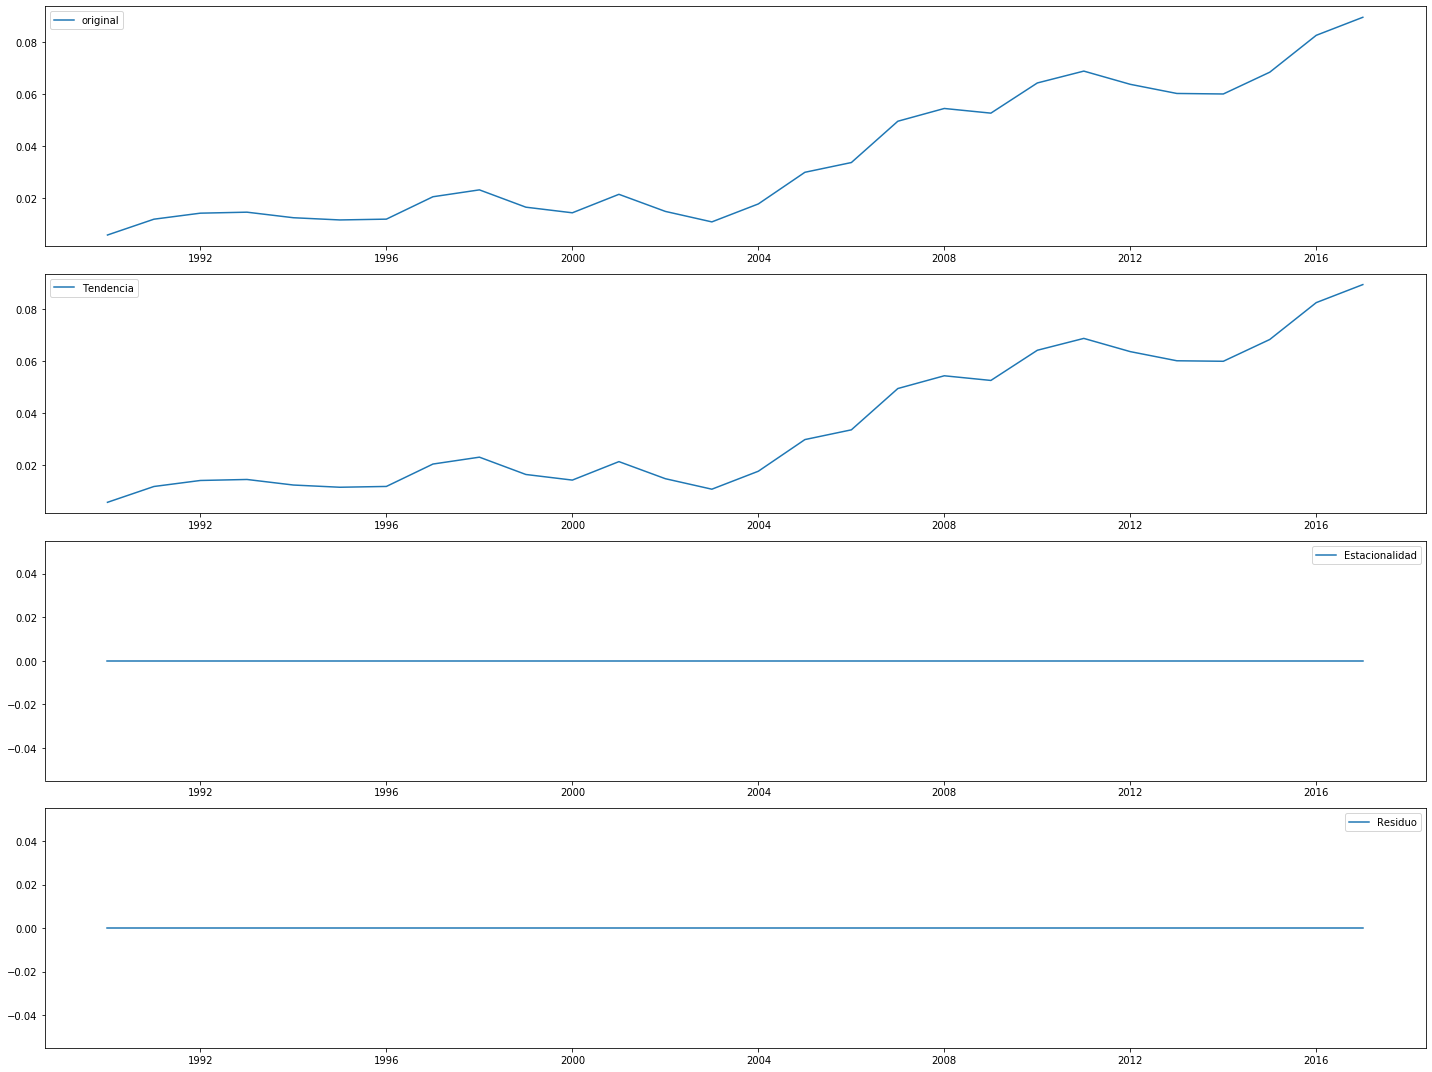

In [8]:
#descomposición estacionaria de la serie para la importación de gasolina
import statsmodels.api as sm
decompose = sm.tsa.seasonal_decompose(gas.importacion, model='additive')

trend = decompose.trend
seasonality = decompose.seasonal
residual = decompose.resid

plt.figure(figsize=(20, 15))
plt.subplot(411)
plt.plot(gas.importacion, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.legend(loc='best')
plt.show()


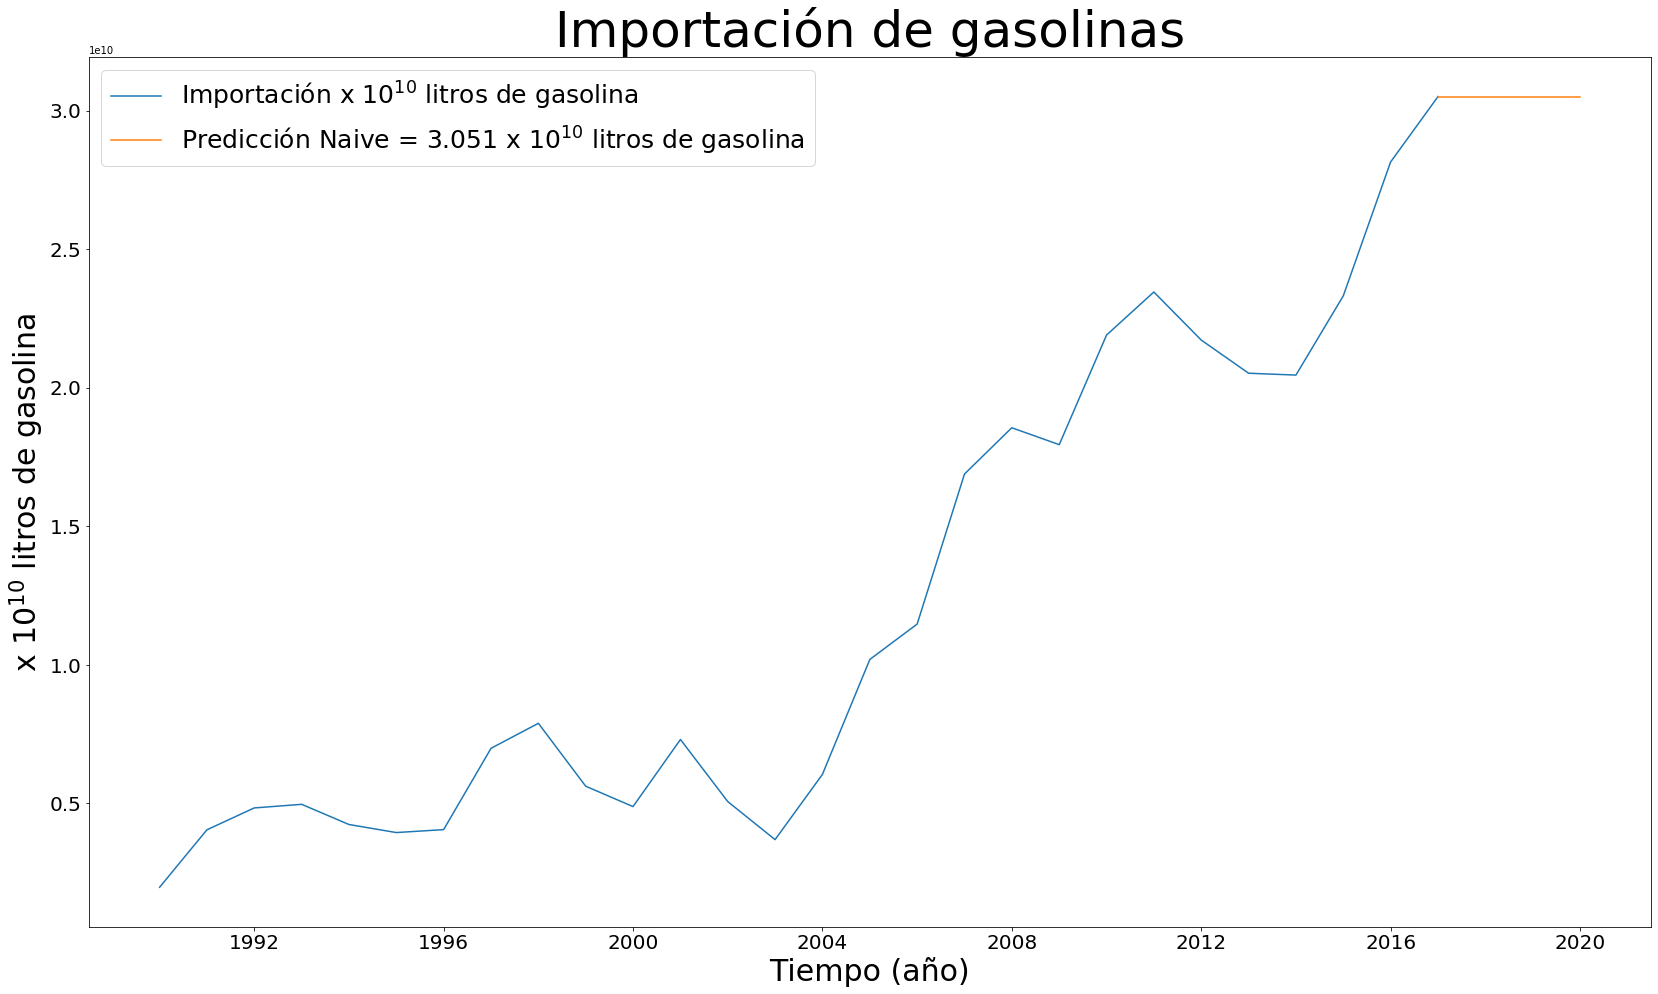

In [9]:
#Naive!
prediction_naive = pd.DataFrame(np.ones(4)*gas.importacion_org[-1])
time_prediction =  pd.date_range('2017', '2020', freq='YS')

prediction_naive.index = time_prediction


plt.figure(figsize = (28, 16))
plt.plot(gas.importacion_org, label='Importación x $10^{10}$ litros de gasolina')
plt.plot(prediction_naive, label='Predicción Naive = %.3f x $10^{10}$ litros de gasolina'%(gas.importacion_org[-1]*10**-10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Serie de tiempo', fontsize=30)
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('x $10^{10}$ litros de gasolina', fontsize=30)
plt.legend(loc='best', fontsize=25)
plt.title('Importación de gasolinas', fontsize=50)
plt.show()

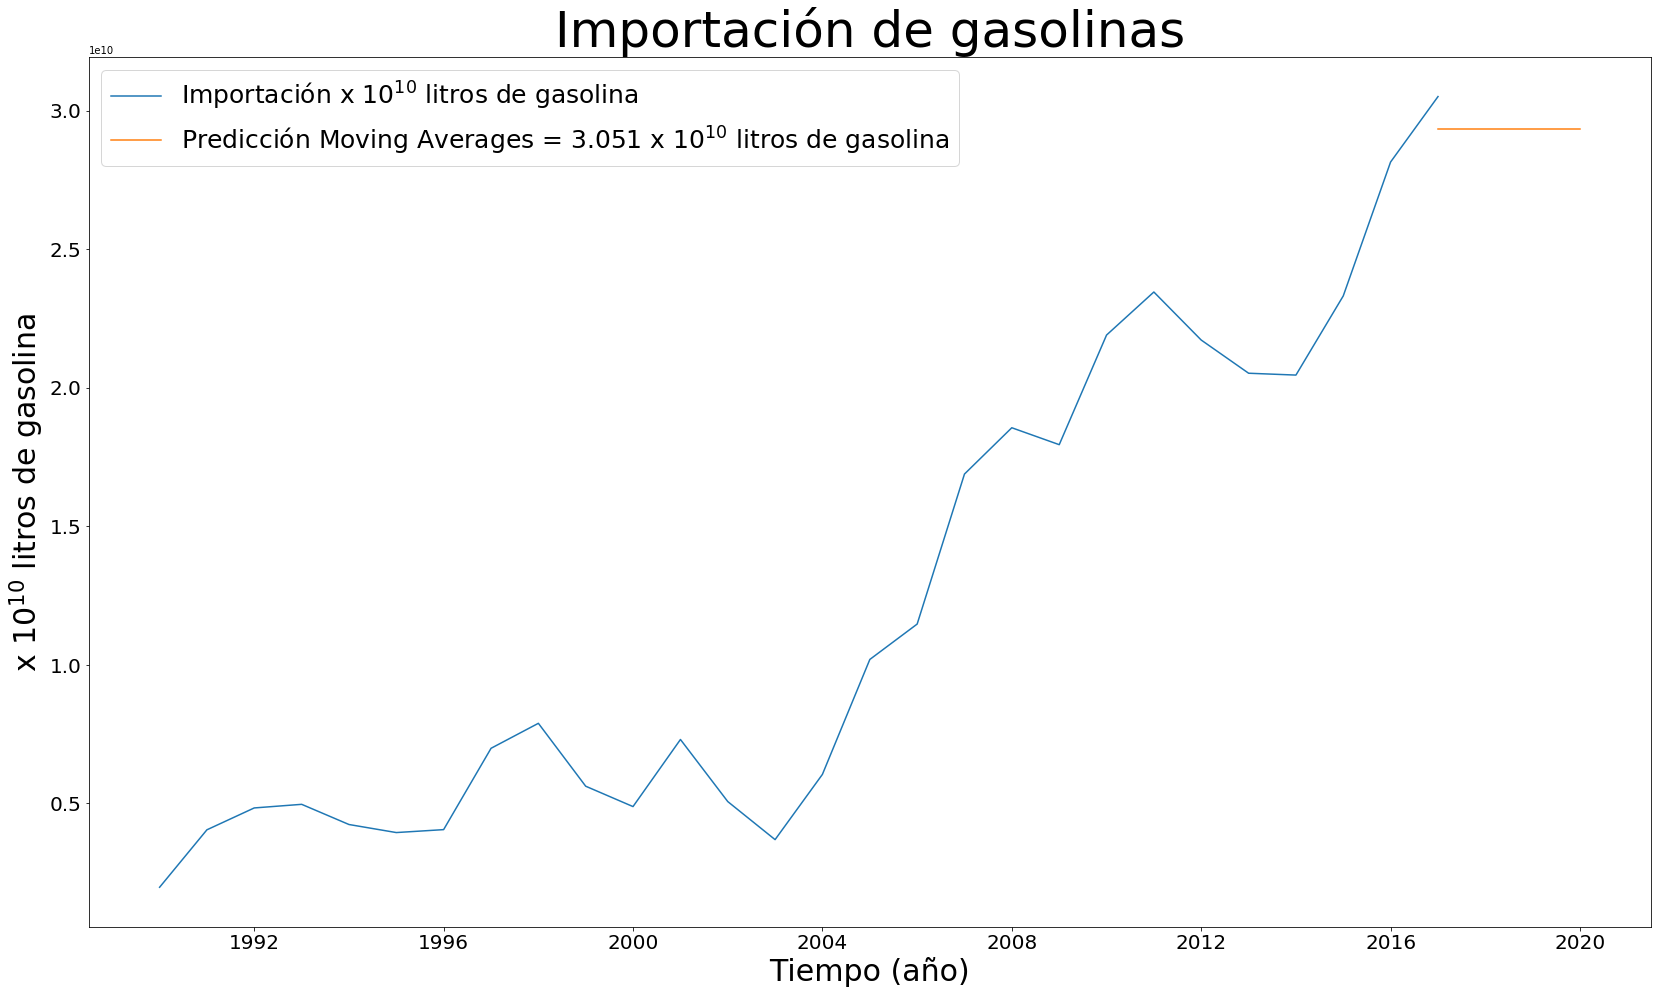

In [10]:
#Moving averages
prediction_moving_avg = pd.DataFrame(np.ones(4)*gas.importacion_org.rolling(2).mean().iloc[-1])
time_prediction =  pd.date_range('2017', '2020', freq='YS')
prediction_moving_avg.index = time_prediction


plt.figure(figsize = (28, 16))
plt.plot(gas.importacion_org, label='Importación x $10^{10}$ litros de gasolina')
plt.plot(prediction_moving_avg, label='Predicción Moving Averages = %.3f x $10^{10}$ litros de gasolina'%(gas.importacion_org[-1]*10**-10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Serie de tiempo', fontsize=30)
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('x $10^{10}$ litros de gasolina', fontsize=30)
plt.legend(loc='best', fontsize=25)
plt.title('Importación de gasolinas', fontsize=50)
plt.show()


c:\users\pc fun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\pc fun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\pc fun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\pc fun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


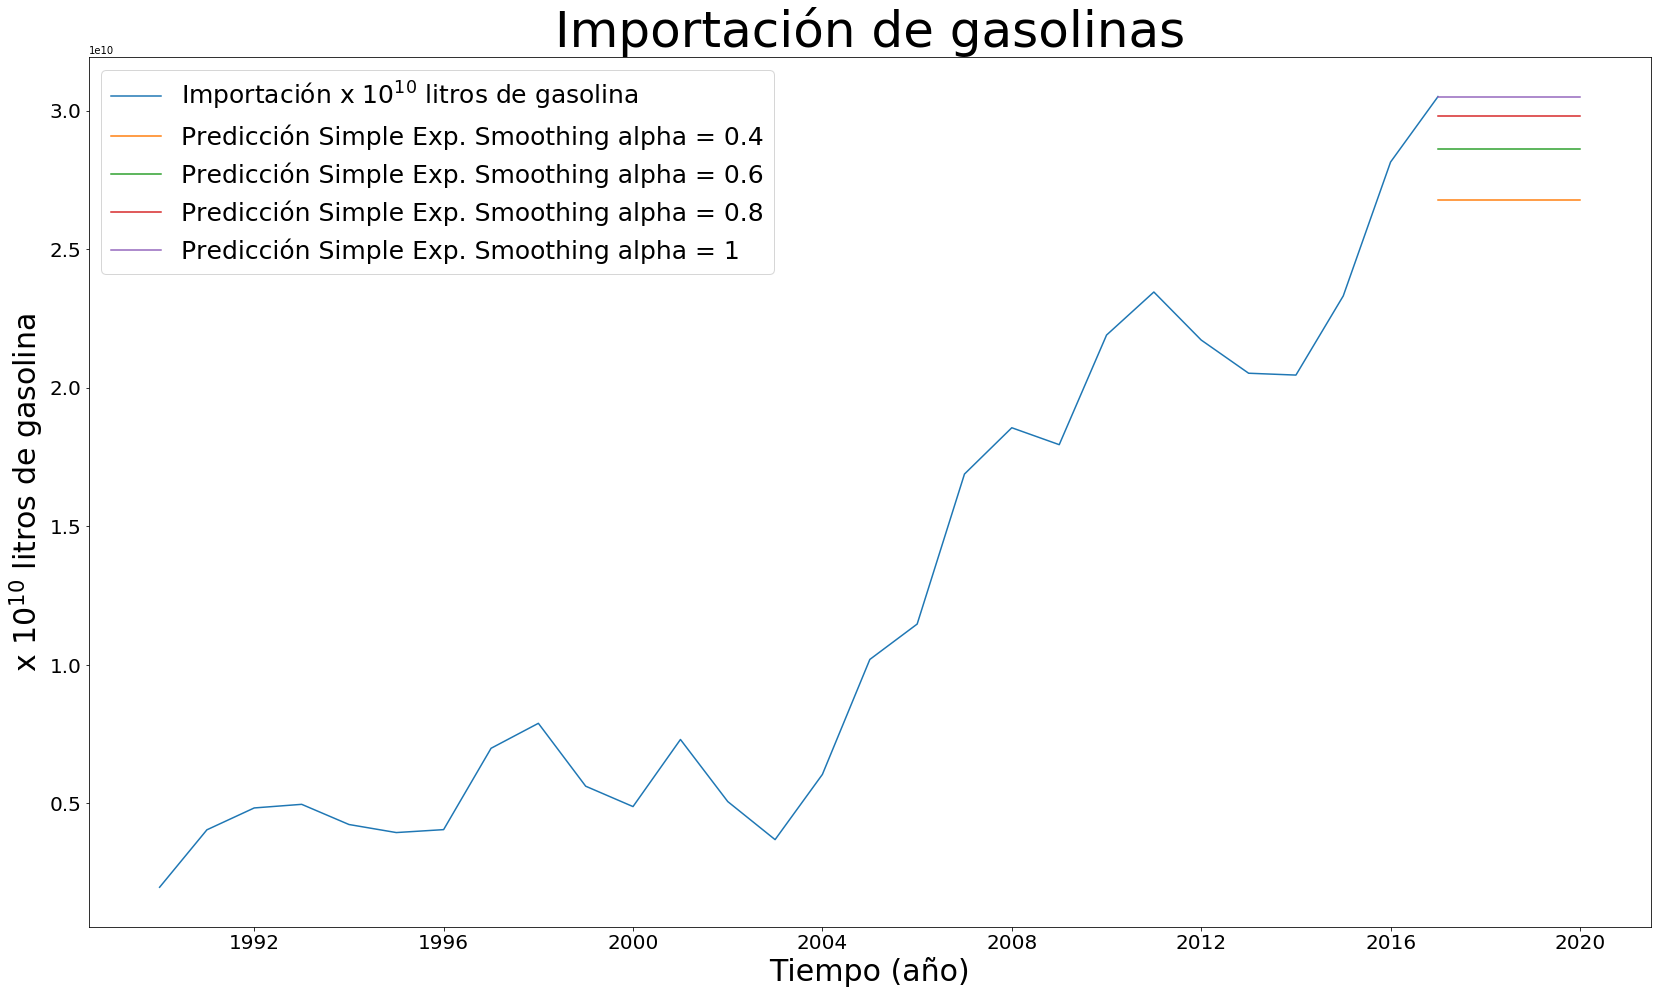

In [11]:
#simple exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

def smoothing(n, m):
    fit = SimpleExpSmoothing(gas.importacion_org).fit(smoothing_level=n, optimized=False, initial_level=m)
    prediction_smothing = pd.DataFrame(fit.forecast(4))
    time_prediction =  pd.date_range('2017', '2020', freq='YS')
    prediction_smothing.index = time_prediction
    return prediction_smothing

plt.figure(figsize = (28, 16))
plt.plot(gas.importacion_org, label='Importación x $10^{10}$ litros de gasolina')
plt.plot(smoothing(0.4, 0.1), label='Predicción Simple Exp. Smoothing alpha = 0.4')
plt.plot(smoothing(0.6, 0.5), label='Predicción Simple Exp. Smoothing alpha = 0.6')
plt.plot(smoothing(0.8, 0.5), label='Predicción Simple Exp. Smoothing alpha = 0.8')
plt.plot(smoothing(1, 0.1), label='Predicción Simple Exp. Smoothing alpha = 1')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Serie de tiempo', fontsize=30)
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('x $10^{10}$ litros de gasolina', fontsize=30)
plt.legend(loc='best', fontsize=25)
plt.title('Importación de gasolinas', fontsize=50)
plt.show()


In [12]:
#haciendo la prueba de Dickey Fuller
print('Resultados de la prueba de Dickey Fuller:')
dftest = sm.tsa.stattools.adfuller(gas.importacion, autolag='AIC')
dfoutput = pd.Series(dftest[0: 4], index=['Test Statistic', 'p-value', '#Lags usados','Numero de observaciones usados'])
for key, value in dftest[4].items():
    dfoutput['Valor critico (%s)' %key] = value
print(dfoutput)

Resultados de la prueba de Dickey Fuller:
Test Statistic                     0.675803
p-value                            0.989342
#Lags usados                       0.000000
Numero de observaciones usados    27.000000
Valor critico (1%)                -3.699608
Valor critico (5%)                -2.976430
Valor critico (10%)               -2.627601
dtype: float64


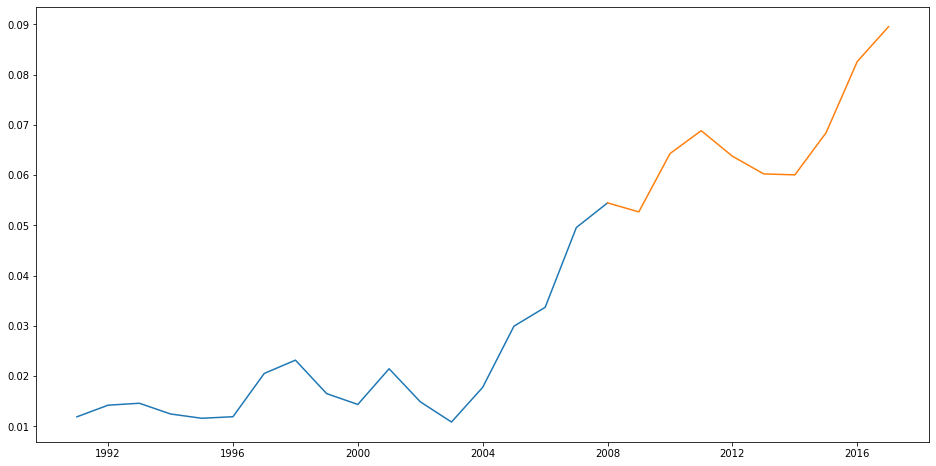

In [13]:
#lo primero que voy a hacer es usar Holt

train = gas.ix['1991':'2008']
valid = gas.ix['2008':'2017']

plt.figure(figsize=(16, 8))
plt.plot(train.importacion)
plt.plot(valid.importacion)
plt.show()

In [14]:
temp = []
l=100
for i in range(l):
    for j in range(l):
        fit1 = Holt(np.asarray(train.importacion)).fit(smoothing_level = i/l, smoothing_slope = j/l)
        valid['Holt_linear'] = fit1.forecast(len(valid))
        rms = np.sqrt(MSE(valid.importacion, valid.Holt_linear))
        temp.append([i/l, j/l, rms])
        
best = np.argmin(np.asarray(temp)[:, 2])
print(temp[best])

c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa

[0.54, 0.09, 77.00803665081119]


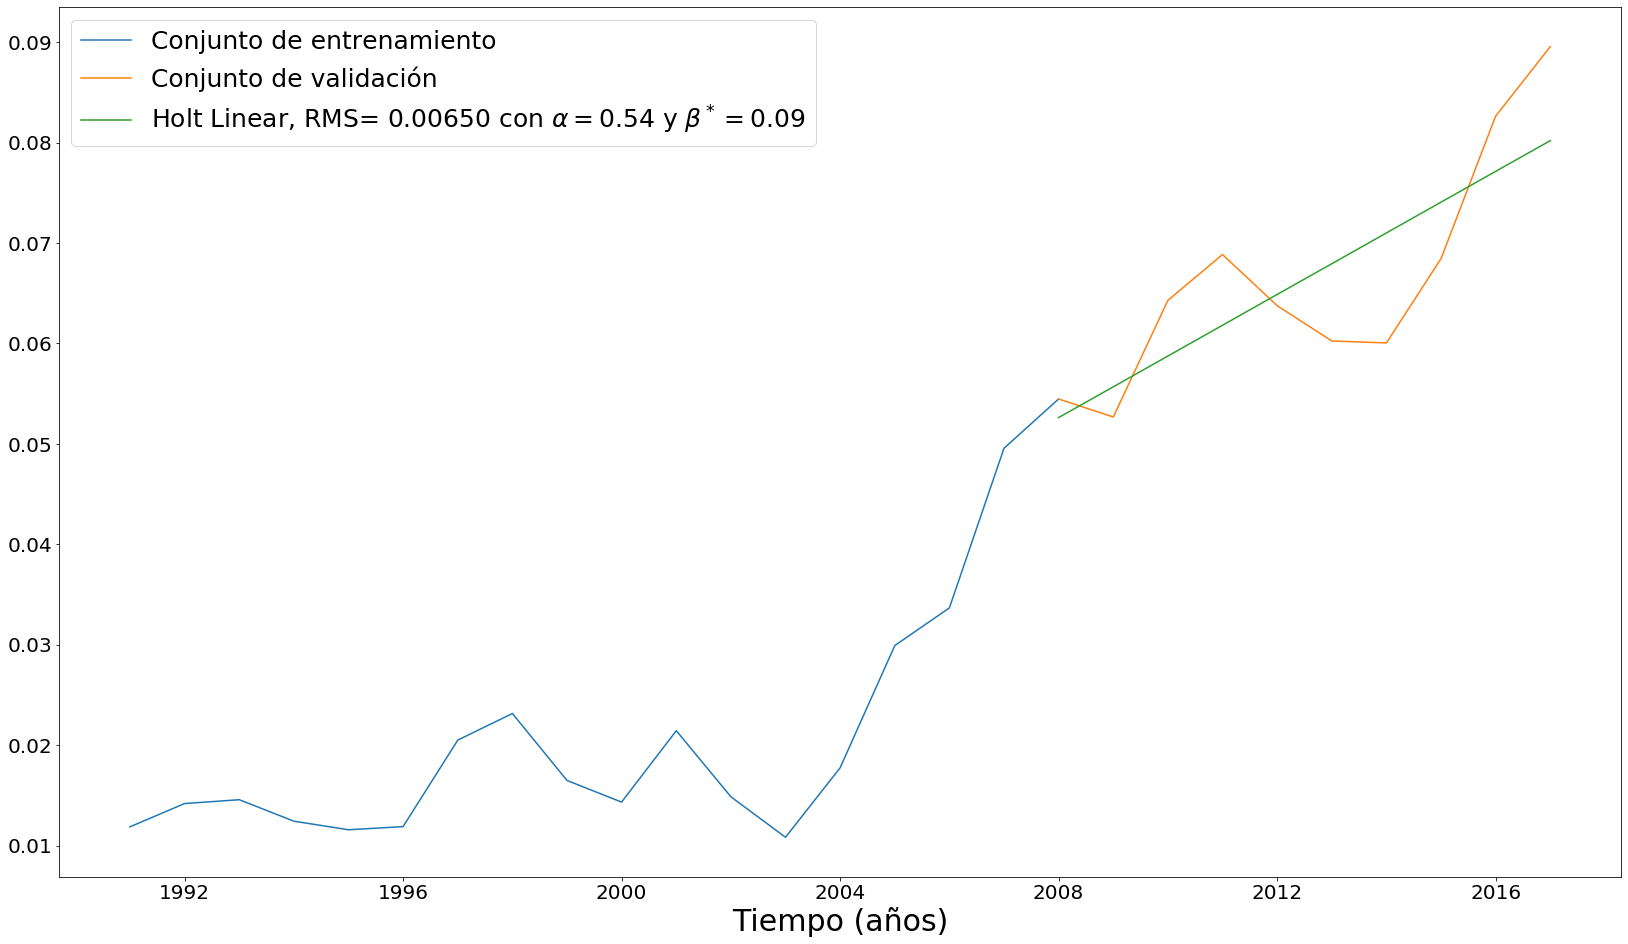

In [21]:
fit1 = Holt(np.asarray(train.importacion)).fit(smoothing_level = 0.54, smoothing_slope = 0.09)
valid['Holt_linear'] = fit1.forecast(len(valid))
rms = np.sqrt(MSE(valid.importacion, valid.Holt_linear))
plt.figure(figsize=(28, 16))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(train.importacion, label='Conjunto de entrenamiento')
plt.plot(valid.importacion, label='Conjunto de validación')
plt.plot(valid.Holt_linear, label=r'Holt Linear, RMS= %.5f con $\alpha = 0.54$ y $\beta^*=0.09$'%rms)
plt.xlabel('Tiempo (años)', fontsize=30)
#plt.title('Modelado usando Holt', fontsize=50)
plt.legend(loc='best', fontsize=25)
plt.show()

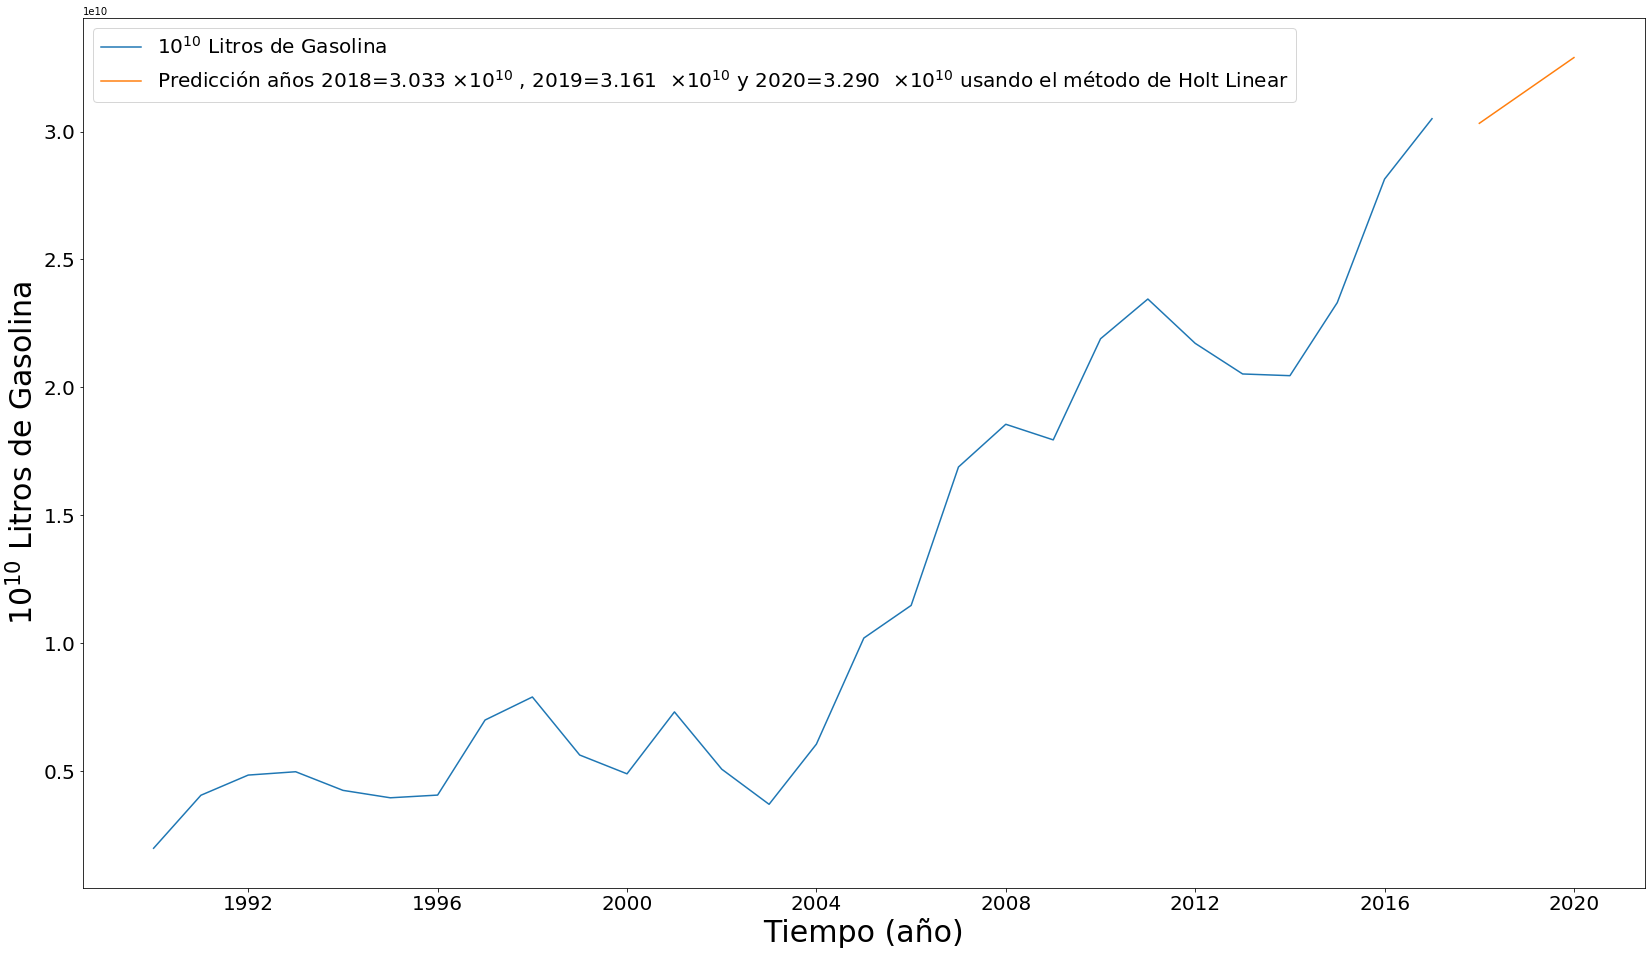

In [23]:
#prediciendo usando toda la serie como entrenamiento

fit1 = Holt(np.asarray(gas.importacion)).fit(smoothing_level = 0.54, smoothing_slope = 0.09)
pred_range = pd.date_range('2018','2020', freq ='YS')
forecast = pd.DataFrame(index=pred_range)
forecast['pred'] = fit1.forecast(3)

plt.figure(figsize=(28, 16))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(gas.importacion*(10**9/34.78)*np.sum(gas['importacion_copy']), label='$10^{10}$ Litros de Gasolina')
plt.plot(forecast['pred']*(10**9/34.78)*np.sum(gas['importacion_copy']), label=r'Predicción años 2018=%.3f $\times 10^{10}$ , 2019=%.3f  $\times 10^{10}$ y 2020=%.3f  $\times 10^{10}$ usando el método de Holt Linear'
         %((forecast['pred']*(1/(34.78*10))*np.sum(gas['importacion_copy']))[0], (forecast['pred']*(1/(34.78*10))*np.sum(gas['importacion_copy']))[1], (forecast['pred']*(1/(34.78*10))*np.sum(gas['importacion_copy']))[2]))
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('$10^{10}$ Litros de Gasolina', fontsize=30)
plt.legend(loc='best', fontsize=20)
#plt.title('Producción de gasolina - $10^{10}$ litros de gasolina - Prediciendo con toda la serie', fontsize=30)
plt.show()

In [25]:
prediction_time = pd.date_range('2007', '2017', freq='Y')
prediction_years = pd.DataFrame(index=prediction_time)
prediction_years['year'] = prediction_time.year

prediction_years['prediction'] = fit1.forecast(len(valid))

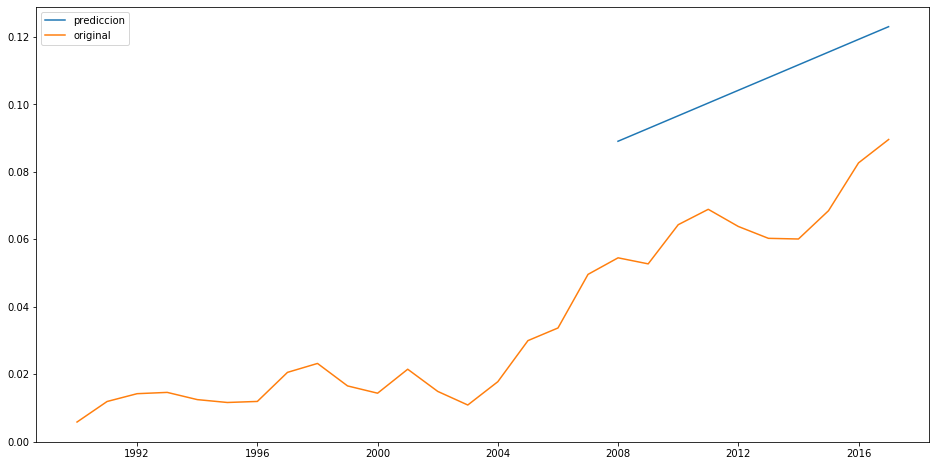

In [26]:
plt.figure(figsize=(16, 8))
plt.plot(prediction_years.prediction, label='prediccion')
plt.plot(gas.importacion, label='original')
plt.legend(loc='best')
plt.show()

Resultados de la prueba de Dickey Fuller:
Test Statistic                    -3.812410
p-value                            0.002783
#Lags usados                       0.000000
Numero de observaciones usados    26.000000
Valor critico (1%)                -3.711212
Valor critico (5%)                -2.981247
Valor critico (10%)               -2.630095
dtype: float64


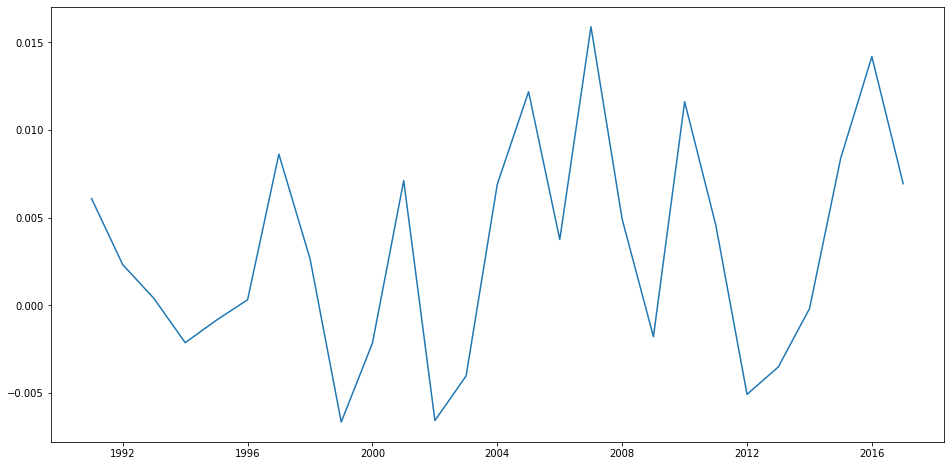

In [27]:
#haciendo la prueba de Dickey Fuller, se podrá aplicar ARIMA?
print('Resultados de la prueba de Dickey Fuller:')
tranf_series1 = ((gas.importacion)/gas.importacion.cumsum()).dropna()
tranf_series = (gas.importacion-gas.importacion.shift(1)).dropna()

tranf_series_rolling = (gas.importacion-gas.importacion.rolling(window=6).mean()).dropna()

dftest = sm.tsa.stattools.adfuller(tranf_series, autolag='AIC')
dfoutput = pd.Series(dftest[0: 4], index=['Test Statistic', 'p-value', '#Lags usados','Numero de observaciones usados'])
for key, value in dftest[4].items():
    dfoutput['Valor critico (%s)' %key] = value
print(dfoutput)

plt.figure(figsize=(16, 8))
plt.plot(tranf_series)
plt.show()

In [28]:
#Curvas ACF y PACF

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(np.log(train.importacion), nlags = 10)
lag_pacf = pacf(np.log(train.importacion), nlags=10, method='ols')

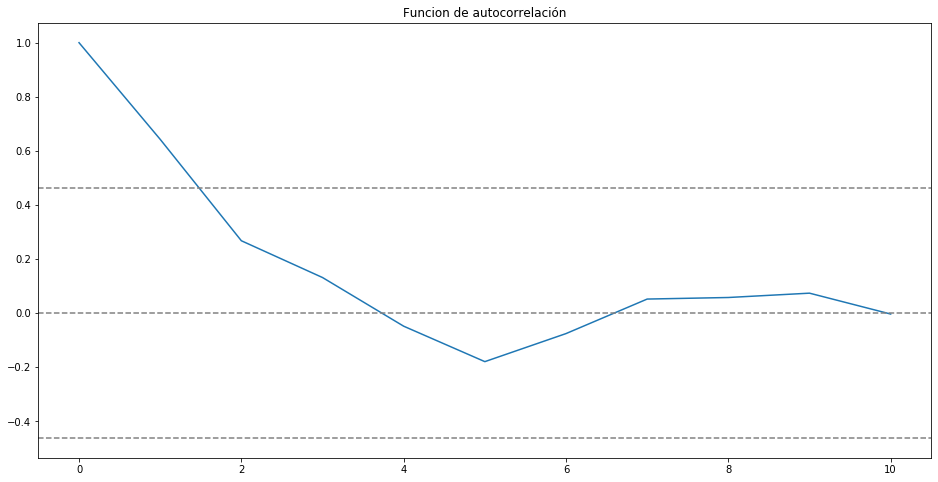

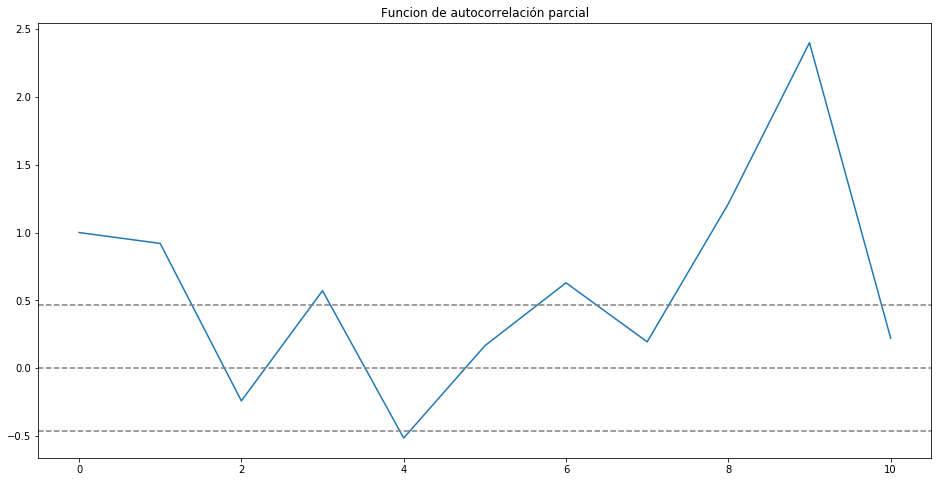

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Funcion de autocorrelación')
plt.show()
plt.figure(figsize=(16, 8))

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Funcion de autocorrelación parcial')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:          D.importacion   No. Observations:                   17
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  62.956
Method:                       css-mle   S.D. of innovations              0.006
Date:                Fri, 15 Nov 2019   AIC                           -119.911
Time:                        17:55:55   BIC                           -117.411
Sample:                    01-01-1992   HQIC                          -119.663
                         - 01-01-2008                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0025      0.002      1.424      0.175      -0.001       0.006
ar.L1.D.importacion     0.2006      0.231      0.869      0.399      -0.252       0.653
                

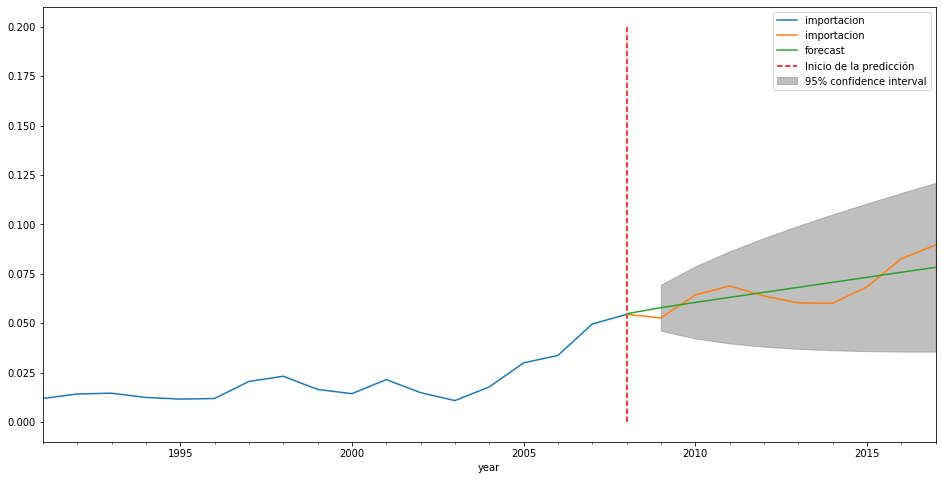

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model_MA = ARIMA(train.importacion, order=(1, 1, 0))
fitted_MA = model_MA.fit()
print(fitted_MA.summary())

fig, ax = plt.subplots(figsize=(16, 8))
train.importacion.plot(ax=ax)
valid.importacion.plot(ax=ax)
ax.vlines('2008', 0, .2, linestyle='--', color='r', label='Inicio de la predicción')
#plt.plot(fitted_MA.fittedvalues, label='fitted')
#plt.plot(fitted_MA.resid.values, label='residuos')
ax = fitted_MA.plot_predict(start='2008', end='2017', dynamic=True, plot_insample=False, ax=ax)


#plt.legend(loc='best')

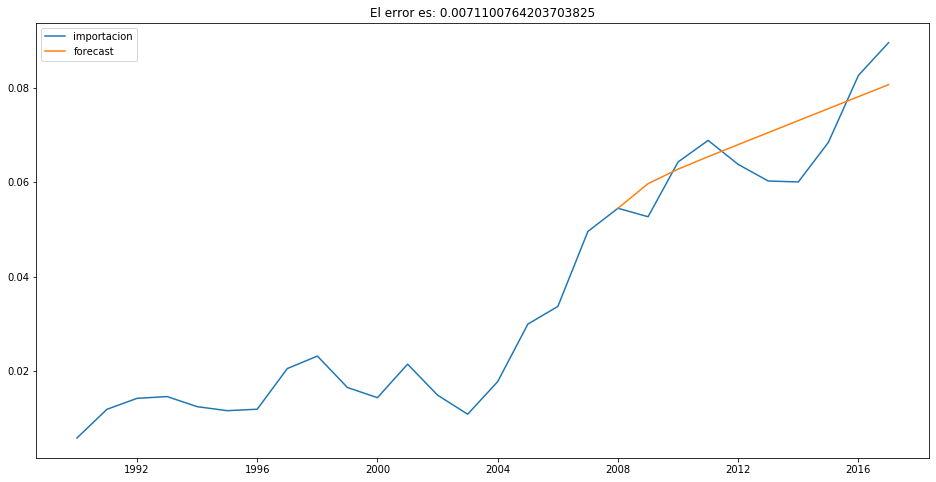

In [32]:
model_fitted = pd.DataFrame({'predicted' : fitted_MA.predict(start='2008', end='2017', dynamic=True).values})
model_fitted.index = fitted_MA.predict(start='2008', end='2017', dynamic=True).index
model_fitted = model_fitted.cumsum().shift().fillna(0).add(valid.importacion.iloc[0])


rme =np.sqrt(MSE(valid.importacion, model_fitted))


plt.figure(figsize=(16, 8))
plt.plot(gas.importacion, label='importacion')
plt.plot(model_fitted, label='forecast')
plt.title('El error es: '+str(rme))
plt.legend(loc='best')
plt.show()